In [1]:
import pickle

with open('data_preparation/kialo_data/1_raw_data/dumped_discussions_first.pickle', 'rb') as f:
    discussions = pickle.load(f)


In [2]:
# Check the first few entries
first_few_discussions = discussions[:2]
first_few_discussions


[{'discussion': {'claims': [{'id': '333.0',
     'authorId': '0077c272-1fdc-4202-a06a-160482dfc12d',
     'created': 1382962412430,
     'version': 2,
     'text': 'Anonymous currency discussions',
     'lastModifiedForSitemaps': 1382962412430},
    {'id': '333.1',
     'authorId': '0077c272-1fdc-4202-a06a-160482dfc12d',
     'created': 1382962412434,
     'version': 4,
     'text': 'An anonymous untrackable digital currency \\(ADC\\), like Bitcoin, is beneficial for civilized societies.',
     'lastModifiedForSitemaps': 1382962412434},
    {'id': '333.2',
     'authorId': '0077c272-1fdc-4202-a06a-160482dfc12d',
     'created': 1382962534883,
     'version': 7,
     'text': "Cash is a necessary part of any functional society's economic model and cryptocurrencies are an easier and online-ready form of cash. They are the natural progression of what money is becoming in the digital age.",
     'lastModifiedForSitemaps': 1519262762906},
    {'id': '333.3',
     'authorId': '0077c272-1fdc-4

(TODO: Change to readable format)# Data Conversion

The JSON structure is converted to dataframes, which facilitates data analysis

In [3]:
# Importing the required library for data conversion
import pandas as pd

# Initializing empty lists to store the flattened data
flattened_discussions = []
flattened_claims = []
flattened_positions = []

# Looping through each discussion to flatten the data structure
for discussion in discussions:
    # Extracting discussion-level attributes
    discussion_id = discussion.get("title", None)
    background_info = discussion.get("background info", None)

    # Appending to the discussion list
    flattened_discussions.append({
        'title': discussion_id,
        'background_info': background_info
    })

    # Looping through claims in each discussion
    claims = discussion.get("discussion", {}).get("claims", [])
    for claim in claims:
        claim['discussion_title'] = discussion_id  # Adding the discussion ID for reference
        flattened_claims.append(claim)

    # Looping through positions in each discussion
    positions = discussion.get("discussion", {}).get("locations", [])
    for position in positions:
        position['discussion_title'] = discussion_id  # Adding the discussion ID for reference
        flattened_positions.append(position)

# Converting the lists to Pandas DataFrames
df_discussions = pd.DataFrame(flattened_discussions)
df_claims = pd.DataFrame(flattened_claims)
df_positions = pd.DataFrame(flattened_positions)

# Showing the first few rows of each DataFrame to check the structure (TODO add diagram to show this relations)
print("discussions \n")
print()
print(df_discussions.head())
print("claims \n")
print()
print(df_claims.head())
print("positions \n")
print()
print(df_positions.head())


discussions 


                                               title  \
0  Are Bitcoin and Similar Cryptocurrencies Good ...   
1             Should we Have a 100% Inheritance Tax?   
2  Autonomous Killing Machines: The Future of War...   
3  Is Capital Punishment in the United States jus...   
4  The world would be better off without organize...   

                                     background_info  
0  In recent years, a surge in its value catapult...  
1  The lottery of birth is sometimes very literal...  
2  Should the West build military killer robots? ...  
3  Capital punishment, or the death penalty, has ...  
4                                                     
claims 


      id                              authorId        created  version  \
0  333.0  0077c272-1fdc-4202-a06a-160482dfc12d  1382962412430        2   
1  333.1  0077c272-1fdc-4202-a06a-160482dfc12d  1382962412434        4   
2  333.2  0077c272-1fdc-4202-a06a-160482dfc12d  1382962534883        7   
3  333.3  00

## Understand Data Structure

### 1. df_discussions
The DataFrame `df_discussions` contains titles and background information for each discussion.

**Columns:**
- `title`: Title of the discussion.
- `background_info`: Additional context or background information related to the discussion.

### 2. df_claims
The DataFrame `df_claims` contains the claims and associated metadata.

**Columns:**
- `id`: ID of the claim. The number behind the decimal place refers to the title id of the discussion (0.0 => 0, 0.1 => 1)
- `authorId`: ID of the claim's author.
- `created`: Timestamp when the claim was created.
- `version`: Number of times the claim has been edited.
- `text`: Text content of the claim.
- `lastModifiedForSitemaps`: Timestamp of the last modification.
- `discussion_title`: Title of the discussion to which the claim belongs.
- `flag`: Metadata related to the claim (e.g. Unsupported, Not a claim, etc.).
- `copierId`: ID of the user who copied the claim (if applicable).
- `accepterId`: ID of the user who accepted the claim (if applicable).
- `discussionLinkTo`: Link to the discussion to which the claim belongs (if applicable).

### 3. df_positions
The DataFrame `df_positions` contains the positions (or locations) and associated metadata. It captures the relationships (PRO or CON) between claims, indicating which claim is a response to another and if it´s supporting it or not.

**Columns:**
- `id`: ID of the position.
- `targetId`: ID of the target claim.
- `version`: Number of times the position has been edited.
- `isOrigin`: Boolean value indicating whether the position is the origin of the discussion.
- `authorId`: ID of the position's author.
- `created`: Timestamp when the position was created.
- `parentId`: ID of the parent claim.
- `relation`: Stance type (Pro or Con).
- `isDeleted`: Boolean value indicating whether the position is deleted.
- `lastModifiedForSitemaps`: Timestamp of the last modification.
- `discussion_title`: Title of the discussion to which the position belongs.
- `flag`: Metadata related to the position (e.g. Unsupported, Not a position, etc.).
- `copierId`: ID of the user who copied the position (if applicable).
- `accepterId`: ID of the user who accepted the position (if applicable).


### Types of Marks (Flags)

According to [Kialo's support page](https://support.kialo.com/en/hc/types-of-mark/), there are 8 different types of marks (or flags) that can be used when marking a claim for review. A claim can be marked (or flagged) with up to 2 different types of mark at a time.

1. **Unsupported**: The claim lacks evidence, either in the form of linked sources or explanatory Pros underneath it.
2. **Not a claim**: A claim must be making an argument, arguing for or against the claim or thesis located above it. Anything that does not do so is not adding to the argument at hand, and therefore is not a claim; this mark is used to point out that problem.
3. **Unclear**: This mark should be used to indicate that the user marking the claim does not understand the meaning of the claim or some aspect of it, or doubts that other readers are able to easily do so.
4. **Vulgar/abusive**: This claim is insulting, overly offensive, or unnecessarily vulgar in expression. Kialo aims to provide the greatest degree of freedom of expression, but this should not be misused to attack or insult others – this mark is used to draw an Admin’s attention to serious misuse of the platform.
5. **Duplicate claim**: The claim repeats another existing claim in the discussion, either in part or in full. This often happens accidentally, when the same claim is created twice or when a claim restates its parent using different wording, consequently not adding anything new to the discussion.
6. **Unrelated**: While the claim is an argument, it does not make a logical connection to its parent, either supporting or attacking it. Therefore, it is potentially irrelevant in its current location.
7. **More than one claim**: The claim contains content that should probably be split into multiple claims.
8. **Move elsewhere**: The claim would fit better at a different location. This mark clears automatically if the claim is moved.

# Data Cleaning (1)
## Selecting Columns
- `copierId` , `accepterId` and `discussionLinkTo` of positions and claims dataframes have been removed for now cause they do not provide an obvious benefit to understanding the flow of a conversation. 
- Also the df_claims_clean etc. do not contain isOrigin and versions of positions which have been added in this new version since they can provide information about recency and about location. 

In [4]:
# Keeping relevant columns
df_claims_clean = df_claims[
    ['id', 'authorId', 'created', 'text', 'version', 'flag', 'lastModifiedForSitemaps', 'discussion_title']]
df_positions_clean = df_positions[
    ['id', 'authorId', 'created', 'version', 'isOrigin', 'parentId', 'targetId', 'relation', 'isDeleted',
     'lastModifiedForSitemaps', 'discussion_title']]

# Filtering out deleted positions
df_positions_clean = df_positions_clean[df_positions_clean['isDeleted'] == False]

# TODO : remove isDeleted attribute?

## Renaming Columns

The column names of the `df_claims_clean` and `df_positions_clean` DataFrames are being updated for better understanding. 

### df_claims_clean

The following columns in `df_claims_clean` DataFrame are renamed such that we can distinguish attribute names between positions and claims easily:

- `id` is renamed to `claimId`
- `created` is renamed to `claimCreated`
- `text` is renamed to `claimText`
- `lastModifiedForSitemaps` is renamed to `lastModified`: This change simplifies the column name to what is relevant for the thesis. 


### df_positions_clean

The following columns in `df_positions_clean` DataFrame are renamed:

- `id` is renamed to `positionId`
- `targetId` is renamed to `sourceClaimId`
- `parentId` is renamed to `targetClaimId`
- `relation` is renamed to `stanceType`: This change clarifies whether a claim is Pro (1) or Con (-1) in relation to its parent.
- `lastModifiedForSitemaps` is renamed to `lastModified`

In [5]:

# Renaming the columns for better clarity
df_claims_clean = df_claims_clean.rename(columns={
    'id': 'claimId',
    'created': 'claimCreated',
    'text': 'claimText',
    'lastModifiedForSitemaps': 'lastModified'
})

df_positions_clean = df_positions_clean.rename(columns={
    'id': 'positionId',
    'targetId': 'sourceClaimId',
    'parentId': 'targetClaimId',
    'relation': 'stanceType',
    'lastModifiedForSitemaps': 'lastModified'
})

df_claims_clean.head(), df_positions_clean.head()

(  claimId                              authorId   claimCreated  \
 0   333.0  0077c272-1fdc-4202-a06a-160482dfc12d  1382962412430   
 1   333.1  0077c272-1fdc-4202-a06a-160482dfc12d  1382962412434   
 2   333.2  0077c272-1fdc-4202-a06a-160482dfc12d  1382962534883   
 3   333.3  0077c272-1fdc-4202-a06a-160482dfc12d  1382962630371   
 4   333.4  0077c272-1fdc-4202-a06a-160482dfc12d  1382962663127   
 
                                            claimText  version flag  \
 0                     Anonymous currency discussions        2  NaN   
 1  An anonymous untrackable digital currency \(AD...        4  NaN   
 2  Cash is a necessary part of any functional soc...        7  NaN   
 3  Most ordinary citizens would not use such a cu...        5  NaN   
 4  Most people pay taxes and banks report all the...        4  NaN   
 
     lastModified                                   discussion_title  
 0  1382962412430  Are Bitcoin and Similar Cryptocurrencies Good ...  
 1  1382962412434  Are Bit

## Timestamps

In [6]:
df_claims_clean_with_features = pd.read_csv(
    "data_preparation/kialo_data/2_cleaned_data_JSON/df_claims_clean_with_features.csv")

# Convert Unix timestamps to human-readable date-time format
df_claims_clean_with_features['claimCreated_readable'] = pd.to_datetime(df_claims_clean_with_features['claimCreated'],
                                                                        unit='ms')
df_claims_clean_with_features['lastModified_readable'] = pd.to_datetime(df_claims_clean_with_features['lastModified'],
                                                                        unit='ms')
df_positions_clean['lastModified_readable'] = pd.to_datetime(df_positions_clean['lastModified'], unit='ms')


In [7]:
# Save the updated DataFrames for future use
df_claims_clean_with_features.to_csv('data_preparation/kialo_data/2_cleaned_data_JSON', index=False)
df_positions_clean.to_csv('data_preparation/kialo_data/2_cleaned_data_JSON', index=False)


PermissionError: [Errno 13] Permission denied: 'data_preparation/kialo_data/2_cleaned_data_JSON'

#### Flags
Flags contain multiple types, often with a 'reason' attached. 

In [8]:
# Converting the 'flag' column to a string representation to handle unhashable types like dictionaries
df_claims_clean['flag_str'] = df_claims_clean['flag'].astype(str)

# Checking unique flag types TODO: "nan" value remove ? 
unique_flags = df_claims_clean['flag_str'].unique()
print(unique_flags)

['nan'
 "{'flagType': 3, 'reason': 'see comments, also seems to be unrelated'}"
 "{'flagType': 1, 'reason': ''}" ...
 "{'flagType': 1, 'reason': 'This is written as a personal experience. It would work better if it was written as a nonpersonal statement.'}"
 "{'flagType': 0, 'reason': 'Needs a source as suggested in the comments.'}"
 "{'flagType': 0, 'reason': 'marking as a reminder to find a source'}"]


# Feature Engineering

In this section, the `version` and `lastModified` features in the df_claims_clean DataFrame are analyzed because they both provide information about time.


In [9]:
# Analyzing 'version' and 'lastModified' further
version_stats = df_claims_clean['version'].describe()
last_modified_stats = df_claims_clean['lastModified'].describe()
print(version_stats)
print()
print(last_modified_stats)

count    679485.000000
mean          1.802965
std           1.327406
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          46.000000
Name: version, dtype: float64

count    6.794850e+05
mean     1.559772e+12
std      4.513152e+10
min      1.380182e+12
25%      1.524335e+12
50%      1.560927e+12
75%      1.595252e+12
max      1.634713e+12
Name: lastModified, dtype: float64


### Observations for Time Features

#### Version
- Count: 679,485
- Mean: ~1.8
- Max: 46

Most claims have a version number around 1-2, indicating that many claims are not modified multiple times.

#### Last Modified 

TODO : Change to readable format

- Mean Timestamp: ~1.56e12  
- Max Timestamp: ~1.63e12

The `lastModified` feature varies significantly, which could be useful for recency information.

#### RecencyComplexity Score

The 75th percentile is a robust normalization factor, reducing outlier influence and balancing between median and maximum. It ensures exceptional cases stand out without losing crucial data.

Before applying this normalization, it's important to verify that it won't eliminate important data. This can be done by plotting the distribution of the data before and after applying the normalization:

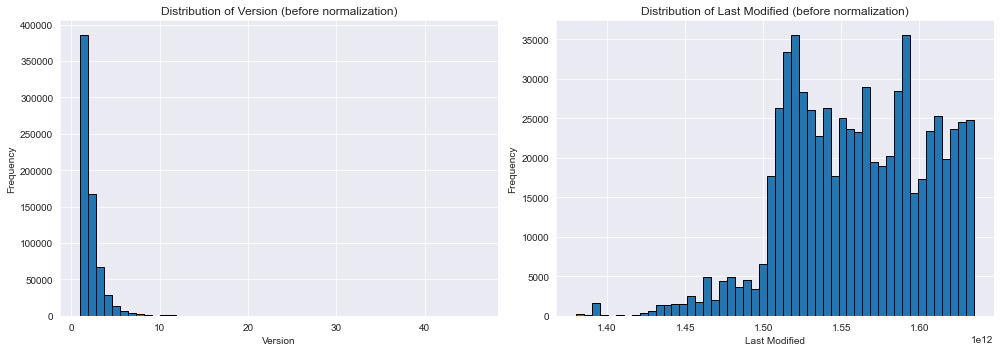

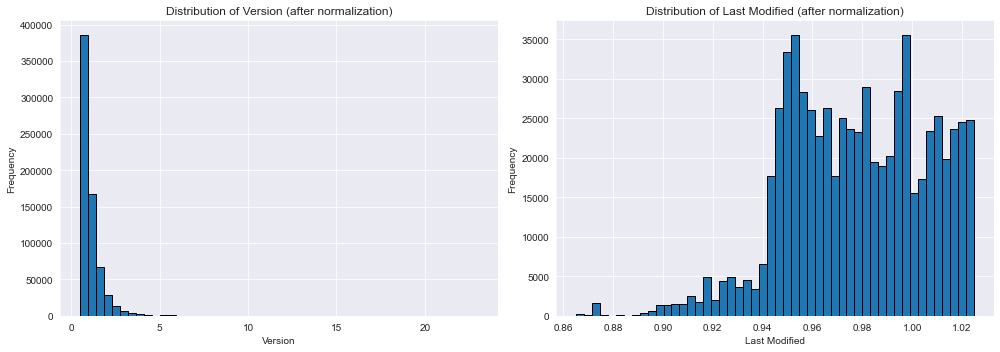

In [10]:
import matplotlib.pyplot as plt

# Plot before normalization
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].hist(df_claims_clean['version'], bins=50, edgecolor='black')
axs[0].set_title('Distribution of Version (before normalization)')
axs[0].set_xlabel('Version')
axs[0].set_ylabel('Frequency')

axs[1].hist(df_claims_clean['lastModified'], bins=50, edgecolor='black')
axs[1].set_title('Distribution of Last Modified (before normalization)')
axs[1].set_xlabel('Last Modified')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculate the 75th percentile for 'version' and 'lastModified'
version_75th_percentile = df_claims_clean['version'].quantile(0.75)
last_modified_75th_percentile = df_claims_clean['lastModified'].quantile(0.75)

# Normalize 'version' and 'lastModified' using the 75th percentile
df_claims_clean['version_normalized'] = df_claims_clean['version'] / version_75th_percentile
df_claims_clean['lastModified_normalized'] = df_claims_clean['lastModified'] / last_modified_75th_percentile

# Plot after normalization
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].hist(df_claims_clean['version_normalized'], bins=50, edgecolor='black')
axs[0].set_title('Distribution of Version (after normalization)')
axs[0].set_xlabel('Version')
axs[0].set_ylabel('Frequency')

axs[1].hist(df_claims_clean['lastModified_normalized'], bins=50, edgecolor='black')
axs[1].set_title('Distribution of Last Modified (after normalization)')
axs[1].set_xlabel('Last Modified')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Looks like the majority of the data was not cut off.

# Data Exploration

## Subset 1 ('RecencyComplexityScore', 'NumFlags', 'claimCreated', 'version', 'lastModified')

TODO: Subset 2 and 3

In [11]:
# Reload the saved DataFrame with new features to continue with the analysis
df_claims_clean = pd.read_csv('./data_preparation/kialo_data/2_cleaned_data_JSON/df_claims_clean_with_features.csv')

# Perform the descriptive statistics on a smaller subset of the data to avoid computational issues
desc_stats_subset = df_claims_clean.sample(frac=0.1, random_state=42)[
    ['RecencyComplexityScore', 'NumFlags', 'claimCreated', 'version', 'lastModified']].describe()

# Calculate correlations between the features on the same subset
correlations_subset = df_claims_clean.sample(frac=0.1, random_state=42)[
    ['RecencyComplexityScore', 'NumFlags', 'claimCreated', 'version', 'lastModified']].corr()

print("description of statistics")
print()
print(desc_stats_subset)
print()
print("correlations of variables ")
print()
print(correlations_subset)


description of statistics

       RecencyComplexityScore      NumFlags  claimCreated       version  \
count            67948.000000  67948.000000  6.794800e+04  67948.000000   
mean                 0.938930      0.072246  1.549324e+12      1.799641   
std                  0.335827      0.405714  4.392105e+10      1.342231   
min                  0.682597      0.000000  1.380183e+12      1.000000   
25%                  0.737685      0.000000  1.517979e+12      1.000000   
50%                  0.757151      0.000000  1.542208e+12      1.000000   
75%                  0.997683      0.000000  1.585230e+12      2.000000   
max                 11.983619      7.000000  1.634713e+12     46.000000   

       lastModified  
count  6.794800e+04  
mean   1.560221e+12  
std    4.505643e+10  
min    1.380184e+12  
25%    1.524829e+12  
50%    1.561298e+12  
75%    1.595970e+12  
max    1.634713e+12  

correlations of variables 

                        RecencyComplexityScore  NumFlags  claimCreated

## Heat Maps

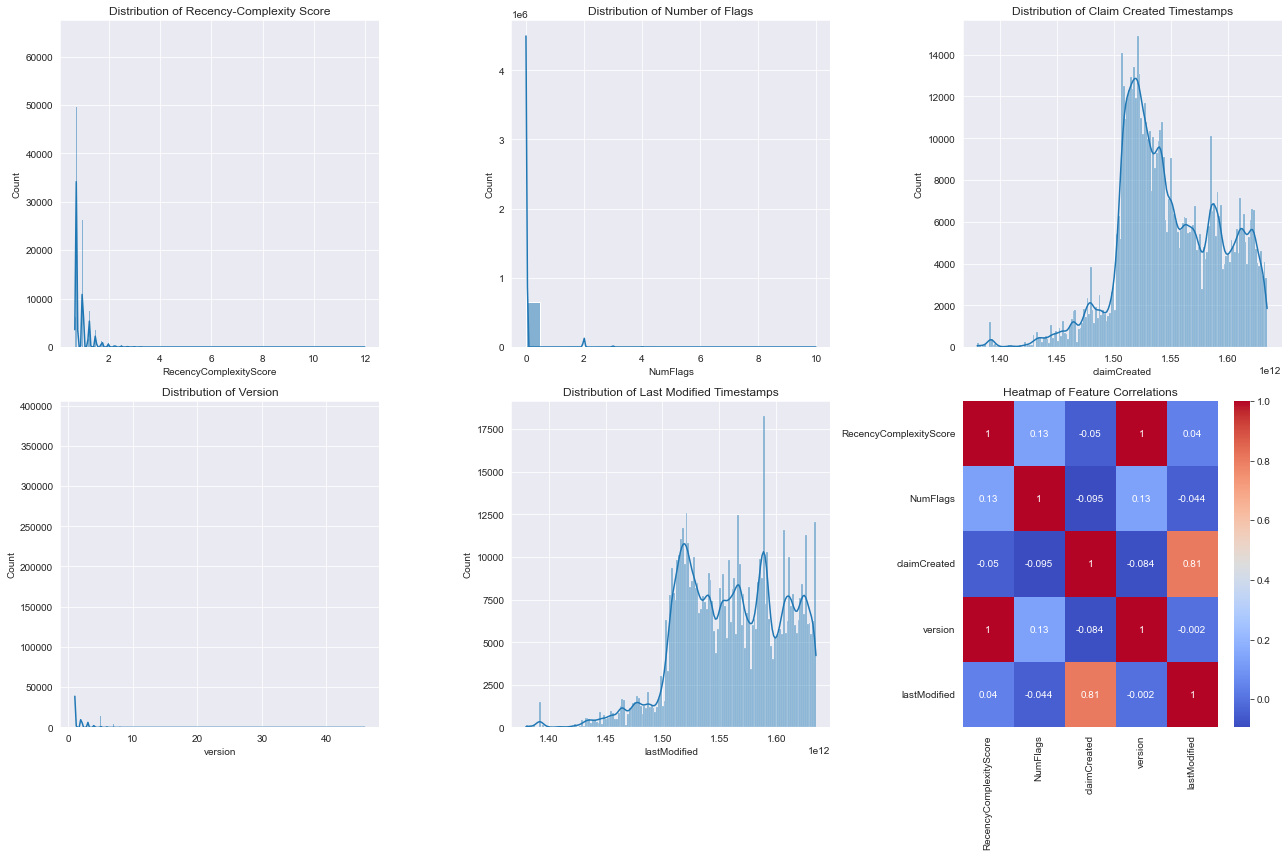

In [12]:
# Importing libraries for data visualization
import seaborn as sns

# Set up the matplotlib figure
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(18, 12))

# Plotting distribution plots for continuous features
sns.histplot(df_claims_clean['RecencyComplexityScore'], kde=True, ax=axs[0, 0]).set_title(
    'Distribution of Recency-Complexity Score')
sns.histplot(df_claims_clean['NumFlags'], kde=True, ax=axs[0, 1]).set_title('Distribution of Number of Flags')
sns.histplot(df_claims_clean['claimCreated'], kde=True, ax=axs[0, 2]).set_title(
    'Distribution of Claim Created Timestamps')
sns.histplot(df_claims_clean['version'], kde=True, ax=axs[1, 0]).set_title('Distribution of Version')
sns.histplot(df_claims_clean['lastModified'], kde=True, ax=axs[1, 1]).set_title(
    'Distribution of Last Modified Timestamps')

# Plotting heatmap for correlations
sns.heatmap(correlations_subset, annot=True, cmap='coolwarm', ax=axs[1, 2]).set_title('Heatmap of Feature Correlations')

# Tight layout
plt.tight_layout()

In [13]:
# Save the plot
eda_plot_path = 'data_preparation/kialo_data/4_diagram_files/eda_plots.png'
plt.savefig(eda_plot_path)
plt.show()
eda_plot_path

<Figure size 432x288 with 0 Axes>

'data_preparation/kialo_data/4_diagram_files/eda_plots.png'

## Exploratory Data Analysis (EDA) Findings

### Distribution Plots

- **Recency-Complexity Score:** Majority are close to 1; some outliers exist.
- **Number of Flags:** Most claims have zero or few flags.
- **Claim Created Timestamps:** Broad distribution, possibly related to the age of the claim.
- **Version:** Most claims have a version close to 1, with a few outliers.
- **Last Modified Timestamps:** Similar to 'Claim Created', indicating that claims are often modified over time.

### Heatmap of Feature Correlations

There is a moderate correlation between 'ClaimCreated' and 'LastModified', confirming that the date, when the claim was created is mostly also the date, when it was last modified. This is supported by the observation that most claims have only 1 version (which is the 1st and last). 

### Observations & Assumptions

- The distribution plots indicate that our data is mostly concentrated around lower values for features like 'RecencyComplexityScore' and 'NumFlags'.
- The heatmap ***confirms that most features are not highly correlated, making them useful for further analysis***.

In [17]:
df_merged.head()

,claimId,authorId,claimCreated,claimText,version,flag,lastModified_x,discussionTitle_x,flag_str,RecencyComplexityScore,...,claimCreated_readable,lastModified_readable_x,positionId,sourceClaimId,targetClaimId,stanceType,isDeleted,lastModified_y,discussionTitle_y,lastModified_readable_y
0,333.0,0077c272-1fdc-4202-a06a-160482dfc12d,1382962412430,Anonymous currency discussions,2,NaN,1382962412430,Are Bitcoin and Similar Cryptocurrencies Good for the World?,NaN,0.933462,...,2013-10-28 12:13:32.430,2013-10-28 12:13:32.430,333.126,333.167,333.0,0.0,False,1.520097e+12,Are Bitcoin and Similar Cryptocurrencies Good for the World?,2018-03-03 17:08:07.014
1,333.1,0077c272-1fdc-4202-a06a-160482dfc12d,1382962412434,"An anonymous untrackable digital currency \(ADC\), like Bitcoin, is beneficial for civilized societies.",4,NaN,1382962412434,Are Bitcoin and Similar Cryptocurrencies Good for the World?,NaN,1.433462,...,2013-10-28 12:13:32.434,2013-10-28 12:13:32.434,333.192,333.200,333.1,1.0,False,1.382963e+12,Are Bitcoin and Similar Cryptocurrencies Good for the World?,2013-10-28 12:15:34.884
2,333.1,0077c272-1fdc-4202-a06a-160482dfc12d,1382962412434,"An anonymous untrackable digital currency \(ADC\), like Bitcoin, is beneficial for civilized societies.",4,NaN,1382962412434,Are Bitcoin and Similar Cryptocurrencies Good for the World?,NaN,1.433462,...,2013-10-28 12:13:32.434,2013-10-28 12:13:32.434,333.194,333.300,333.1,-1.0,False,1.382963e+12,Are Bitcoin and Similar Cryptocurrencies Good for the World?,2013-10-28 12:17:10.372
3,333.1,0077c272-1fdc-4202-a06a-160482dfc12d,1382962412434,"An anonymous untrackable digital currency \(ADC\), like Bitcoin, is beneficial for civilized societies.",4,NaN,1382962412434,Are Bitcoin and Similar Cryptocurrencies Good for the World?,NaN,1.433462,...,2013-10-28 12:13:32.434,2013-10-28 12:13:32.434,333.202,333.120,333.1,-1.0,False,1.382963e+12,Are Bitcoin and Similar Cryptocurrencies Good for the World?,2013-10-28 12:22:59.958
4,333.1,0077c272-1fdc-4202-a06a-160482dfc12d,1382962412434,"An anonymous untrackable digital currency \(ADC\), like Bitcoin, is beneficial for civilized societies.",4,NaN,1382962412434,Are Bitcoin and Similar Cryptocurrencies Good for the World?,NaN,1.433462,...,2013-10-28 12:13:32.434,2013-10-28 12:13:32.434,333.205,333.170,333.1,1.0,False,1.382963e+12,Are Bitcoin and Similar Cryptocurrencies Good for the World?,2013-10-28 12:30:16.087


In [19]:
import pandas as pd

df_claims = pd.read_csv(
    './data_preparation/kialo_data/2_cleaned_data_JSON/df_claims_clean_with_readable_timestamps.csv')
df_positions = pd.read_csv(
    './data_preparation/kialo_data/2_cleaned_data_JSON/df_positions_clean_with_readable_timestamps.csv')
# Load the cleaned DataFrames with readable timestamps
df_claims_clean = df_claims
df_positions_clean = df_positions

# Merge the two DataFrames on 'claimId' and 'targetClaimId'
df_merged = pd.merge(df_claims_clean, df_positions_clean, left_on='claimId', right_on='targetClaimId', how='left')

# Drop redundant columns
if 'discussionTitle_x' in df_merged.columns and 'discussionTitle_y' in df_merged.columns:
    if df_merged['discussionTitle_x'].equals(df_merged['discussionTitle_y']):
        df_merged.drop(['discussionTitle_y'], axis=1, inplace=True)

# Remove missing values for the analysis
df_merged.dropna(subset=['claimId', 'authorId', 'claimText', 'stanceType'], inplace=True)

# Group by 'authorId' to get the number of claims per author
claims_per_author = df_merged['authorId'].value_counts()

# Group by 'discussionTitle_x' to get the number of claims per topic
claims_per_topic = df_merged['discussionTitle_x'].value_counts()

# Calculate the depth of discussions
# We assume the depth is represented by the number of related claims to a parent claim
depth_of_claims = df_merged['targetClaimId'].value_counts()

# Return some basic statistics
claims_per_author.describe(), claims_per_topic.describe(), depth_of_claims.describe()


(count    24736.000000
 mean        34.232091
 std        252.729448
 min          1.000000
 25%          2.000000
 50%          5.000000
 75%         15.000000
 max      15656.000000
 Name: authorId, dtype: float64,
 count    10758.000000
 mean        78.710262
 std        369.847790
 min          1.000000
 25%          5.000000
 50%         16.000000
 75%         42.000000
 max      19700.000000
 Name: discussionTitle_x, dtype: float64,
 count    225716.000000
 mean          3.751462
 std           6.746710
 min           1.000000
 25%           1.000000
 50%           2.000000
 75%           4.000000
 max         464.000000
 Name: targetClaimId, dtype: float64)

In [20]:
import pandas as pd

df_claims = pd.read_csv(
    './data_preparation/kialo_data/2_cleaned_data_JSON/df_claims_clean_with_readable_timestamps.csv')
df_positions = pd.read_csv(
    './data_preparation/kialo_data/2_cleaned_data_JSON/df_positions_clean_with_readable_timestamps.csv')
# Load the cleaned DataFrames with readable timestamps
df_claims_clean = df_claims
df_positions_clean = df_positions

# Merge the two DataFrames on 'claimId' and 'targetClaimId'
df_merged = pd.merge(df_claims_clean, df_positions_clean, left_on='claimId', right_on='targetClaimId', how='left')

In [21]:
df_merged.head()

,claimId,authorId,claimCreated,claimText,version,flag,lastModified_x,discussionTitle_x,flag_str,RecencyComplexityScore,...,claimCreated_readable,lastModified_readable_x,positionId,sourceClaimId,targetClaimId,stanceType,isDeleted,lastModified_y,discussionTitle_y,lastModified_readable_y
0,333.0,0077c272-1fdc-4202-a06a-160482dfc12d,1382962412430,Anonymous currency discussions,2,NaN,1382962412430,Are Bitcoin and Similar Cryptocurrencies Good for the World?,NaN,0.933462,...,2013-10-28 12:13:32.430,2013-10-28 12:13:32.430,333.126,333.167,333.0,0.0,False,1.520097e+12,Are Bitcoin and Similar Cryptocurrencies Good for the World?,2018-03-03 17:08:07.014
1,333.1,0077c272-1fdc-4202-a06a-160482dfc12d,1382962412434,"An anonymous untrackable digital currency \(ADC\), like Bitcoin, is beneficial for civilized societies.",4,NaN,1382962412434,Are Bitcoin and Similar Cryptocurrencies Good for the World?,NaN,1.433462,...,2013-10-28 12:13:32.434,2013-10-28 12:13:32.434,333.192,333.200,333.1,1.0,False,1.382963e+12,Are Bitcoin and Similar Cryptocurrencies Good for the World?,2013-10-28 12:15:34.884
2,333.1,0077c272-1fdc-4202-a06a-160482dfc12d,1382962412434,"An anonymous untrackable digital currency \(ADC\), like Bitcoin, is beneficial for civilized societies.",4,NaN,1382962412434,Are Bitcoin and Similar Cryptocurrencies Good for the World?,NaN,1.433462,...,2013-10-28 12:13:32.434,2013-10-28 12:13:32.434,333.194,333.300,333.1,-1.0,False,1.382963e+12,Are Bitcoin and Similar Cryptocurrencies Good for the World?,2013-10-28 12:17:10.372
3,333.1,0077c272-1fdc-4202-a06a-160482dfc12d,1382962412434,"An anonymous untrackable digital currency \(ADC\), like Bitcoin, is beneficial for civilized societies.",4,NaN,1382962412434,Are Bitcoin and Similar Cryptocurrencies Good for the World?,NaN,1.433462,...,2013-10-28 12:13:32.434,2013-10-28 12:13:32.434,333.202,333.120,333.1,-1.0,False,1.382963e+12,Are Bitcoin and Similar Cryptocurrencies Good for the World?,2013-10-28 12:22:59.958
4,333.1,0077c272-1fdc-4202-a06a-160482dfc12d,1382962412434,"An anonymous untrackable digital currency \(ADC\), like Bitcoin, is beneficial for civilized societies.",4,NaN,1382962412434,Are Bitcoin and Similar Cryptocurrencies Good for the World?,NaN,1.433462,...,2013-10-28 12:13:32.434,2013-10-28 12:13:32.434,333.205,333.170,333.1,1.0,False,1.382963e+12,Are Bitcoin and Similar Cryptocurrencies Good for the World?,2013-10-28 12:30:16.087


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned DataFrames with readable timestamps
df_claims_clean = pd.read_csv('/mnt/data/df_claims_clean_with_readable_timestamps.csv')
df_positions_clean = pd.read_csv('/mnt/data/df_positions_clean_with_readable_timestamps.csv')

# Merge the two DataFrames on 'claimId' and 'targetClaimId'
df_merged = pd.merge(df_claims_clean, df_positions_clean, left_on='claimId', right_on='targetClaimId', how='left')

# Remove missing values for the analysis
df_merged.dropna(subset=['claimId', 'authorId', 'claimText', 'stanceType'], inplace=True)

# Group by 'authorId' to get the number of claims per author
claims_per_author = df_merged['authorId'].value_counts()

# Group by 'discussionTitle' to get the number of claims per topic
claims_per_topic = df_merged['discussionTitle_x'].value_counts()

# Calculate the depth of discussions
# We assume the depth is represented by the number of related claims to a parent claim
depth_of_claims = df_merged['targetClaimId'].value_counts()

# Set up the matplotlib figure
fig, axs = plt.subplots(ncols=3, figsize=(18, 6))

# Plotting boxplot for Claims per Author
sns.boxplot(x=claims_per_author, ax=axs[0]).set_title('Boxplot of Claims per Author')

# Plotting histogram for Claims per Topic
sns.histplot(claims_per_topic, kde=False, bins=50, ax=axs[1]).set_title('Histogram of Claims per Topic')

# Plotting histogram for Depth of Claims
sns.histplot(depth_of_claims, kde=False, bins=50, ax=axs[2]).set_title('Histogram of Depth of Claims')

plt.tight_layout()

In [ ]:
# Save the plots
boxplot_path = 'data_preparation/kialo_data/4_diagram_files/boxplot_claims_per_author.png'
hist_claims_per_topic_path = 'data_preparation/kialo_data/4_diagram_files/histogram_claims_per_topic.png'
hist_depth_of_claims_path = 'data_preparation/kialo_data/4_diagram_files/histogram_depth_of_claims.png'

fig.savefig(boxplot_path)
fig.savefig(hist_claims_per_topic_path)
fig.savefig(hist_depth_of_claims_path)

boxplot_path, hist_claims_per_topic_path, hist_depth_of_claims_path

# Graph Representation

## Parsing the discussion graph

The discussion graph is parsed from the JSON structure. The graph is represented as a directed graph, where the nodes are claims and the edges are positions with a relation/stance type (Pro or Con). 

We skipped:
- the discussions with missing claims or locations since they do not provide useful information in their isolated state.
- locations that are marked as deleted or have no parent claim and thus are irrelevant.

In [59]:
import pickle
import igraph as ig

pickle_file = open(r"C:\Users\nico\Dropbox\HSLU\Bachelorarbeit\Code\data\dumped_discussions_first.pickle", "rb")
# load discussions

dumped_discussions = pickle.load(pickle_file)


# parse_graph
def parse_discussion_graph(discussion):
    # added check for missing claims or locations
    if 'claims' not in discussion['discussion'] or 'locations' not in discussion['discussion']:
        print(f"Skipping discussion due to missing 'claims' or 'locations': {discussion['title']}")
        return None  # Return None if claims or locations are missing

    discussion_graph = ig.Graph()
    vertex_id_mappings = {}

    for i, claim in enumerate(discussion["discussion"]["claims"]):
        vertex = discussion_graph.add_vertex({"id": claim["id"], "text": claim["text"]})
        vertex_id_mappings[claim["id"]] = vertex.index

    for location in discussion["discussion"]["locations"]:
        if location["isDeleted"] == True:
            continue
        if location["parentId"] is None:
            continue

        source = vertex_id_mappings[location["targetId"]]
        parent = vertex_id_mappings[location["parentId"]]
        discussion_graph.add_edge(source=source, target=parent, relation=location["relation"])

    # ignore isolated (no edge) claims
    discussion_graph.vs.select(_degree=0).delete()

    return discussion_graph


parsed_discussion_graphs = [parse_discussion_graph(dumped_discussion) for dumped_discussion in dumped_discussions if
                            dumped_discussion is not None]


Skipping discussion due to missing 'claims' or 'locations': anti no bulling hate speach at all or harrasiment or aganst any religion
Skipping discussion due to missing 'claims' or 'locations': the big huge prolbem with religions espaily crristanity baptiest methides hope community church to witch i belong to taa


In [ ]:
import pickle

# Load the parsed discussion graphs from the saved pickle file
pickle_file_path = r'C:\Users\nico\Dropbox\HSLU\Bachelorarbeit\Code\data\parsed_discussion_graphs.pickle'
with open(pickle_file_path, 'rb') as f:
    parsed_discussion_graphs = pickle.load(f)

In [62]:
# Check the type and number of loaded graphs
num_of_graphs = len(parsed_discussion_graphs)
type(parsed_discussion_graphs), num_of_graphs

(list, 17832)

## Discussion Structure: Depth and Breadth

- *Depth*: Maximum number of levels in each discussion.
- *Breadth*: Average number of child nodes per parent node.

In [68]:
import numpy as np

# Step 1: Check for None Graphs
none_count = sum([1 for graph in parsed_discussion_graphs if graph is None])
empty_count = 0
# Step 2: Skip None values in loop
depths = []
breadths = []

for graph in parsed_discussion_graphs:
    if graph is None:
        print("Skipping None graph.")
        continue

    if len(graph.vs) == 0:
        print("Skipping empty graph.")
        empty_count += 1
        continue

    # Depth: Longest path in the graph
    distances = np.array(graph.distances())
    depth = np.max(distances[distances < np.inf])  # Exclude infinite values
    depths.append(depth)

    # Breadth: Average number of child nodes per parent
    avg_degree = np.mean(graph.degree(mode="out"))
    breadths.append(avg_degree)



Number of None graphs: 2
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skipping empty graph.
Skippin

In [74]:
print(f"Number of None-graphs: {none_count}")
print(f"Number of Empty-graphs: {empty_count}")

Number of None-graphs: 2
Number of Empty-graphs: 849


In [75]:
mean_depth = np.mean(depths)
median_depth = np.median(depths)
std_dev_depth = np.std(depths)
print("depth mean: ", mean_depth)
print("depth median: ", median_depth)
print("std dev depth: ", std_dev_depth)
print("\n")
mean_breadth = np.mean(breadths)
median_breadth = np.median(breadths)
std_dev_breadth = np.std(breadths)
print("mean_breadth: ", mean_breadth)
print("median_breadth: ", median_breadth)
print("std_dev_breadth: ", std_dev_breadth)


depth mean:  3.4818326364760614
depth median:  2.0
std dev depth:  3.6829125176557675


mean_breadth:  1.5272547237333767
median_breadth:  1.7142857142857142
std_dev_breadth:  0.4125034907430631


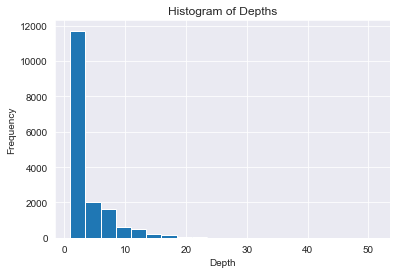

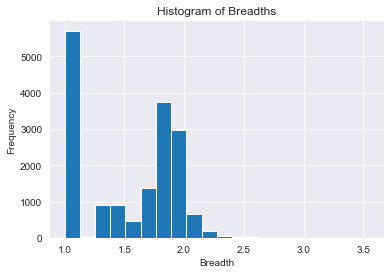

In [76]:
import matplotlib.pyplot as plt

plt.hist(depths, bins=20)
plt.title('Histogram of Depths')
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.show()

plt.hist(breadths, bins=20)
plt.title('Histogram of Breadths')
plt.xlabel('Breadth')
plt.ylabel('Frequency')
plt.show()


## Discussion Structure Analysis

### Objective
The aim of this section is to understand the depth and breadth of discussions in the dataset and their implications for assessing the ability of language models to follow discussions.

### Methodology
- **Depth Analysis**: The depth is calculated as the longest path in the discussion graph.
- **Breadth Analysis**: The breadth is measured as the average number of child nodes per parent in the graph.

### Findings

#### Depth of Discussions 
- Mean: 3.48 claims deep
- Median: 2.0 claims deep
- Standard Deviation: 3.68 claims deep

#### Breadth of Discussions
- Mean: 1.53 child nodes
- Median: 1.71 child nodes
- Standard Deviation: 0.41 child nodes

#### Correlation Between Depth and Breadth
- Value: 0.66

### Interpretation

#### Depth
- **Shallow Depth**: The shallow depth in most discussions suggests that arguments are usually not extensively countered or supported, implying straightforward discussions.

#### Breadth
- **Narrow Breadth**: Indicates less diversity in viewpoints at the same argument level.
- **Wide Breadth**: Implies more diversity but could also mean redundancy or lack of full engagement from participants.
#### Correlation
A correlation of approximately 0.66 between depth and breadth suggests a moderate positive correlation. This could imply that discussions that are deeper (more complex) also tend to have more branches (breadth) or the other way round.
### Conclusions
- **Depth**: Most discussions are straightforward and don't delve deep into additional layers of reasoning.
- **Breadth**: There is a varied breadth, indicating that while some discussions may lack diversity, others offer a range of viewpoints.

## Outlier Detection

In [80]:
# Define outlier thresholds (using 2 standard deviations as a threshold for demonstration purposes)
depth_upper_threshold = mean_depth + 2 * std_dev_depth
depth_lower_threshold = mean_depth - 2 * std_dev_depth

breadth_upper_threshold = mean_breadth + 2 * std_dev_breadth
breadth_lower_threshold = mean_breadth - 2 * std_dev_breadth

# Identify outliers
depth_outliers = [x for x in depths if x > depth_upper_threshold or x < depth_lower_threshold]
breadth_outliers = [x for x in breadths if x > breadth_upper_threshold or x < breadth_lower_threshold]

print("number of depth outliers", len(depth_outliers))
print("number of breath outliers", len(breadth_outliers))

number of depth outliers 990
number of breath outliers 46


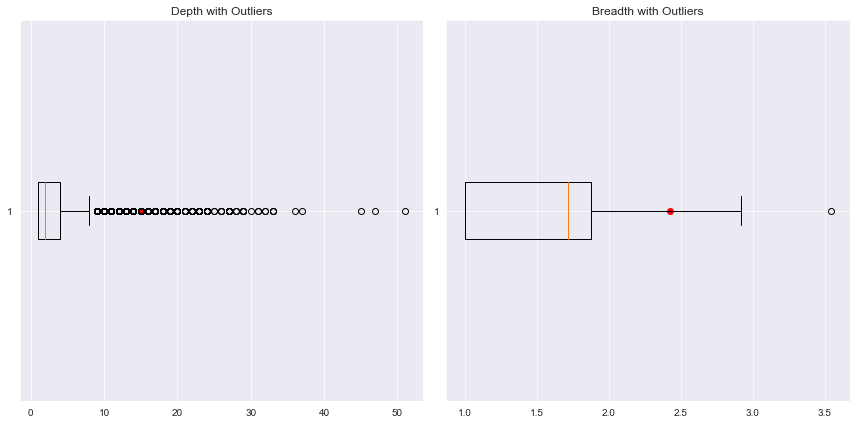

mean/median marked as red point
depth_outliers_mean:  15.0
depth_outliers_median:  15.0


breadth_outliers_mean:  2.423948220064725
breadth_outliers_median:  2.423948220064725


In [87]:

# Function to identify outliers based on the Z-score (default threshold = 2 std dev away from the mean)
def identify_outliers(data, threshold=2):
    mean = np.mean(data)
    std = np.std(data)
    z_scores = [(y - mean) / std for y in data]
    return np.where(np.abs(z_scores) > threshold)[0]


# Extracting the first element from the tuple returned by np.where
depth_outliers_indices = identify_outliers(depths)[0]
breadth_outliers_indices = identify_outliers(breadths)[0]

# Values of the outliers
depth_outliers_values = depths[depth_outliers_indices]
breadth_outliers_values = breadths[breadth_outliers_indices]

# Converting to numpy arrays    
depth_outliers_values = np.array([depth_outliers_values])
breadth_outliers_values = np.array([breadth_outliers_values])

# Plotting depth and breadth with outliers marked
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Depth with Outliers')
plt.boxplot(depths, vert=False)
plt.scatter(depth_outliers_values, [1] * len(depth_outliers_values), color='red')

plt.subplot(1, 2, 2)
plt.title('Breadth with Outliers')
plt.boxplot(breadths, vert=False)
plt.scatter(breadth_outliers_values, [1] * len(breadth_outliers_values), color='red')

plt.tight_layout()
plt.show()

# Summary statistics of outliers
depth_outliers_mean = np.mean(depth_outliers_values)
breadth_outliers_mean = np.mean(breadth_outliers_values)

depth_outliers_median = np.median(depth_outliers_values)
breadth_outliers_median = np.median(breadth_outliers_values)

# Return these stats for further interpretation
print("mean/median marked as red point")
print("\n")
print("depth_outliers_mean: ", depth_outliers_mean)
print("depth_outliers_median: ", depth_outliers_median)
print("\n")
print("breadth_outliers_mean: ", breadth_outliers_mean)
print("breadth_outliers_median: ", breadth_outliers_median)

### Findings

#### Depth
- **Mean**: 15.0
- **Median**: 15.0

#### Breadth
- **Mean**: 2.42
- **Median**: 2.42

Given that the Z-score threshold was set to 2, the calculated mean and median suggest that discussions with a depth or breadth significantly different from these values are outliers. This could imply:

### Interpretation

#### For Depth
- Discussions with depth significantly higher than 15 ***could be highly nuanced***, with multiple layers of arguments and counterarguments.
- Conversely, discussions with a much lower depth are ***likely to be shallower/less debated***, with fewer layers of counterarguments.

#### For Breadth
- Discussions with a breadth significantly higher than 2.42 could indicate a ***wide range of perspectives*** and might be more diverse.
- Lower breadth values suggest less diversity in the arguments and may consist of ***similar points being reiterated***.

These outliers can be further analyzed to understand what makes them deviate from the norm (TODO). The deviation could be due to the topic, the participants, or some other external factors influencing the discussion dynamics.  

In [83]:
print(type(depth_outliers_values))
print(depth_outliers_values.shape)

print(type(breadth_outliers_values))
print(breadth_outliers_values.shape)


<class 'numpy.float64'>
()
<class 'numpy.float64'>
()


In [77]:
correlation = np.corrcoef(depths, breadths)[0, 1]
print(f"Correlation between Depth and Breadth: {correlation}")

Correlation between Depth and Breadth: 0.6595607271226103


# Candidate Metrics to Probe

## Key Aspects for Language Models
Following features can potentially used to probe the ability of language models to follow discussions:
### 1. Discussion Structure (Depth and Breadth)
**Relevance**: Understanding the structural complexity of discussions is crucial for designing tests for Language Models (LLMs). For instance, deeper discussions may require more advanced attention mechanisms in the models.

### 2. Author Engagement (Multiple Discussions)
**Relevance**: Evaluating whether authors engage in multiple discussions is important for assessing a model's ability to follow context switches or diversify topics.

### 3. Discussion Balance (Pro vs Con)
**Relevance**: If discussions are highly polarized, LLMs should be capable of recognizing and adapting to these stances.

### 4. Author Dominance
**Relevance**: Identifying dominant authors is crucial for understanding potential biases in the data, which LLMs might inherit.

### 5. Discussion Evolution (Time Analysis)
**Relevance**: Tracking how discussions evolve over time is important for LLMs to understand the flow and relevance of claims.

### 6. Response Time
**Relevance**: The speed of responses, whether quick or delayed, could indicate the urgency or thoughtfulness required in a discussion, a feature LLMs should ideally recognize.

### 7. Topic Clustering
**Relevance**: Understanding the major themes in the dataset allows us to tailor LLM probing tasks more effectively.